# Application

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import ParameterGrid
from matplotlib import pyplot as plt

In [12]:
sns.set()
pd.set_option('display.max_columns', None)

In [20]:
sessions = pd.read_csv('sessions_preprocessed.csv', delimiter=';')

## K-Means

### Iterative Helper Function for Visualization of Configurations

In [21]:
def plot_scores(plot_scores_sessions):
    n_clusters = list(range(2,21))
    parameter_grid = ParameterGrid({'n_clusters': n_clusters, 'random_state': list(range(0, 43))})
    ss_scores, ch_scores, db_scores = {}, {}, {}
    kmeans_model = KMeans()
    
    for p in parameter_grid:
        kmeans_model.set_params(**p)
        kmeans_model.fit(plot_scores_sessions) # fit model on wine dataset, this will find clusters based on parameter p
        labels = kmeans_model.predict(plot_scores_sessions)
        
        ss = silhouette_score(plot_scores_sessions, labels)   # calculate silhouette_score
        ch = calinski_harabasz_score(plot_scores_sessions, labels)   # calculate calinski harabasz
        db = davies_bouldin_score(plot_scores_sessions, labels)   # calculate davies bouldin
        
        if p['n_clusters'] in ss_scores:
            ss_scores[p['n_clusters']] += [ss]
            ch_scores[p['n_clusters']] += [ch]
            db_scores[p['n_clusters']] += [db]
        else:
            ss_scores[p['n_clusters']] = [ss]
            ch_scores[p['n_clusters']] = [ch]
            db_scores[p['n_clusters']] = [db]
            
    ss_best_scores = [max(ss_scores[key]) for key in sorted(ss_scores)]
    ch_best_scores = [max(ch_scores[key]) for key in sorted(ch_scores)]
    db_best_scores = [min(db_scores[key]) for key in sorted(db_scores)]
    
    ss_best_states = [sorted(zip(ss_scores[key],range(0, len(ss_scores[key]))), reverse=True)  for key in sorted(ss_scores)]
    ch_best_states = [sorted(zip(ch_scores[key],range(0, len(ch_scores[key]))), reverse=True)  for key in sorted(ch_scores)]
    db_best_states = [sorted(zip(db_scores[key],range(0, len(db_scores[key]))), reverse=False)  for key in sorted(db_scores)] 
    
    return ss_best_scores,ss_best_states, ch_best_scores, ch_best_states, db_best_scores, db_best_states

In [22]:
sessions_kmeans_ss = sessions.drop(["id"], axis=1)
ss_best_scores, ss_best_states, ch_best_scores, ch_best_states, db_best_scores, db_best_states = plot_scores(sessions_kmeans_ss)

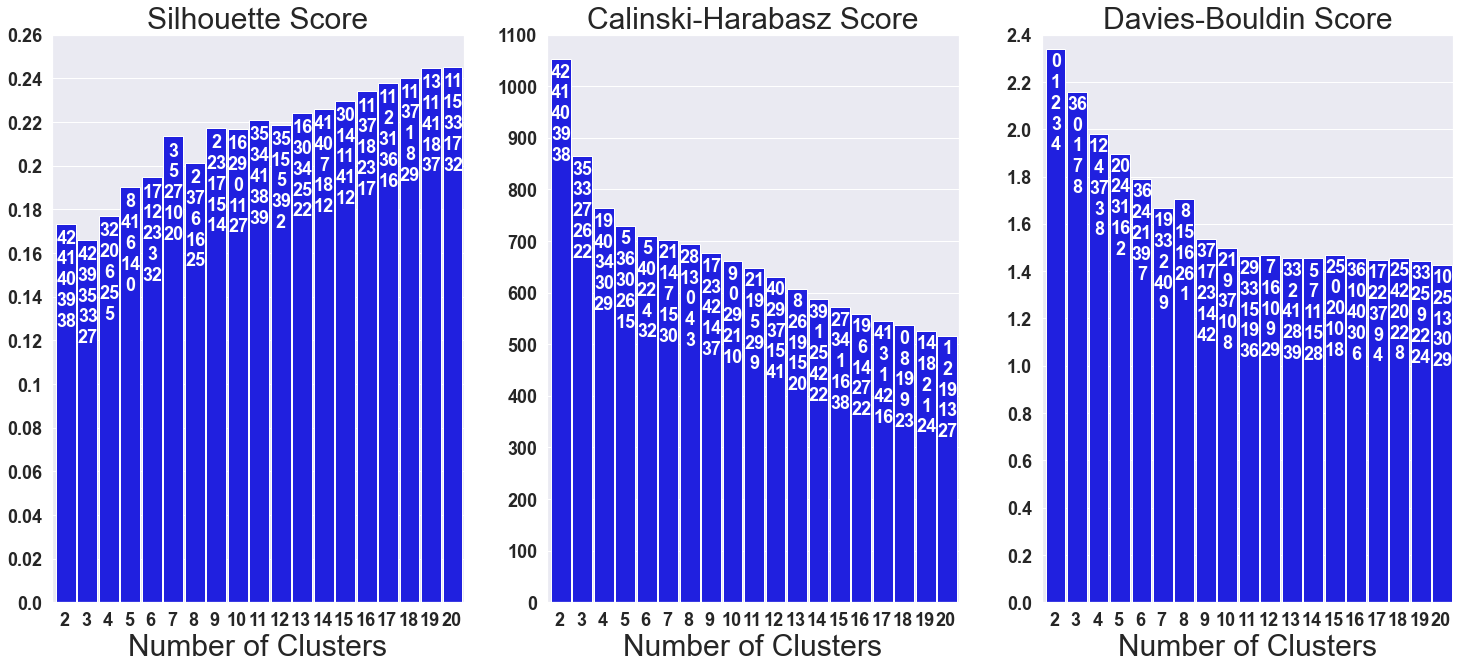

In [23]:
n_clusters = list(range(2,21))
random_state = list(range(0, 43))

sns.set(rc = {'figure.figsize':(21,10)}, style="darkgrid", font_scale=2.5)
plt.subplot(1,3,1)
ax = sns.barplot(x="n", y="scores", data=pd.DataFrame({'n': n_clusters, 'scores': ss_best_scores}), color="blue")
ax.set(title='Silhouette Score', xlabel="Number of Clusters", ylabel=None, xticks=range(len(ss_best_scores)), yticks=np.arange(0, 0.30, 0.02), ylim=(0,0.26))
ax.set_xticklabels(labels=n_clusters, size=18, weight='bold')
ax.set_yticklabels(labels=np.arange(0, 0.30, 0.02), size=18, weight='bold')
ax.margins(x=.01)
for p, state in zip(ax.patches, ss_best_states):
    ax.annotate("%.0f\n%.0f\n%.0f\n%.0f\n%.0f" % (state[0][1], state[1][1], state[2][1], state[3][1], state[4][1]), (p.get_x() + p.get_width() / 2. + 0.08, p.get_height() - 0.028),
                 ha='center', va='center', fontsize=18, color='white', xytext=(0, 5), fontweight='bold',
                 textcoords='offset points')
    p.set_width(0.925)
plt.subplot(1,3,2)
ax = sns.barplot(x="n", y="scores", data=pd.DataFrame({'n': n_clusters, 'scores': ch_best_scores}), color="blue")
ax.set(title='Calinski-Harabasz Score', xlabel="Number of Clusters", ylabel=None, xticks=range(len(ch_best_scores)), yticks=np.arange(0, 1200, 100), ylim=(0,1100))
ax.set_xticklabels(labels=n_clusters, size=18, weight='bold')
ax.set_yticklabels(labels=np.arange(0, 1200, 100), size=18, weight='bold')
ax.margins(x=0.01)
for p, state in zip(ax.patches, ch_best_states):
    ax.annotate("%.0f\n%.0f\n%.0f\n%.0f\n%.0f" % (state[0][1], state[1][1], state[2][1], state[3][1], state[4][1]), (p.get_x() + p.get_width() / 2. + 0.08, p.get_height() - 115),
                 ha='center', va='center', fontsize=18,color='white', xytext=(0, 5), fontweight='bold',
                 textcoords='offset points')
    p.set_width(0.925)
plt.subplot(1,3,3)
ax = sns.barplot(x="n", y="scores", data=pd.DataFrame({'n': n_clusters, 'scores': db_best_scores}), color="blue")
ax.set(title='Davies-Bouldin Score', xlabel="Number of Clusters", ylabel=None, xticks=range(len(db_best_scores)), yticks=np.arange(0, 2.5, 0.2), ylim=(0,2.4))
ax.set_xticklabels(labels=n_clusters, size=18, weight='bold')
ax.set_yticklabels(labels=np.round(np.arange(0, 2.6, 0.2), 1), size=18, weight='bold')
ax.margins(x=0.01)
for p, state in zip(ax.patches, db_best_states):
    ax.annotate("%.0f\n%.0f\n%.0f\n%.0f\n%.0f" % (state[0][1], state[1][1], state[2][1], state[3][1], state[4][1]), (p.get_x() + p.get_width() / 2. + 0.08, p.get_height() - 0.25),
                 ha='center', va='center', fontsize=18, color='white', xytext=(0, 5), fontweight='bold',
                 textcoords='offset points')
    p.set_width(0.925)
plt.tight_layout()
plt.show()

In [24]:
sessions_kmeans = sessions.drop(["id"], axis=1)
kmeans = KMeans(n_clusters=9, random_state=17)
kmeans.fit(sessions_kmeans)
clusters_kmeans = kmeans.predict(sessions_kmeans)
sessions_kmeans["cluster"] = clusters_kmeans

print("Silhouette Coefficient: %0.3f" % silhouette_score(sessions_kmeans.drop(["cluster"], axis=1), clusters_kmeans))
print("Calinski Harabasz Coefficient: %0.3f" % calinski_harabasz_score(sessions_kmeans.drop(["cluster"], axis=1), clusters_kmeans))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(sessions_kmeans.drop(["cluster"], axis=1), clusters_kmeans))

Silhouette Coefficient: 0.212
Calinski Harabasz Coefficient: 676.089
Davies Bouldin Coefficient: 1.538


### Local Outlier Removal

In [27]:
sessions_kmeans_outliers = sessions_kmeans.copy()
sessions_kmeans_outliers["id"] = sessions["id"]
centroids = kmeans.cluster_centers_
kmeans_thresh = 2 # z-score
outlier_ids = []

for i, centroid in enumerate(centroids):
    sessions_kmeans_cluster = sessions_kmeans_outliers[sessions_kmeans_outliers.cluster == i].drop(["cluster"], axis=1)
    sessions_cluster_ids = sessions_kmeans_cluster['id']
    sessions_kmeans_cluster.drop(["id"], inplace=True, axis=1)
    sessions_kmeans_cluster = sessions_kmeans_cluster.T.apply(lambda x: x - centroid).T
    sessions_kmeans_cluster["distance"] = [np.linalg.norm(session) for session in sessions_kmeans_cluster.to_numpy()]
    sessions_kmeans_cluster["zscore"] = (sessions_kmeans_cluster["distance"] - np.mean(sessions_kmeans_cluster["distance"])) / np.std(sessions_kmeans_cluster["distance"])
    sessions_kmeans_cluster["outlier"] = [True if x > kmeans_thresh else False for x in sessions_kmeans_cluster["zscore"]]
    sessions_kmeans_cluster["id"] = sessions_cluster_ids
    outlier_ids.append(sessions_kmeans_cluster[sessions_kmeans_cluster["outlier"] == True]["id"].to_list())

outlier_ids = sum(outlier_ids, [])
sessions_kmeans_outliers.loc[sessions_kmeans_outliers.id.isin(outlier_ids), "cluster"] = -1

In [28]:
sessions_kmeans_filtered = sessions_kmeans_outliers[sessions_kmeans_outliers["cluster"] != -1].drop(["id"], axis=1)
print("Silhouette Coefficient: %0.3f" % silhouette_score(sessions_kmeans_filtered.drop(["cluster"], axis=1), sessions_kmeans_filtered['cluster']))
print("Calinski Harabasz Coefficient: %0.3f" % calinski_harabasz_score(sessions_kmeans_filtered.drop(["cluster"], axis=1), sessions_kmeans_filtered['cluster']))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(sessions_kmeans_filtered.drop(["cluster"], axis=1), sessions_kmeans_filtered['cluster']))

Silhouette Coefficient: 0.221
Calinski Harabasz Coefficient: 695.972
Davies Bouldin Coefficient: 1.508


## DBSCAN

### Find the Optimal Configuration

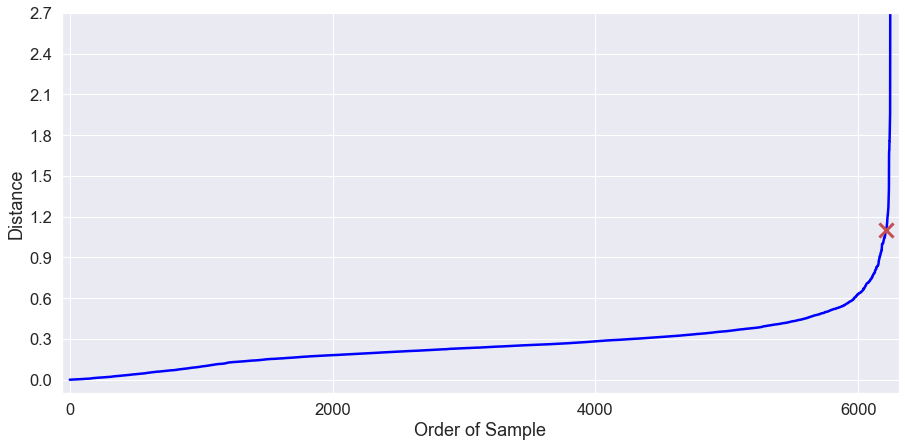

In [31]:
sessions_dbscan = sessions.drop(["id"], axis=1)
min_sample = 2 * len(sessions_dbscan.columns)
neighb = NearestNeighbors(n_neighbors=min_sample) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(sessions_dbscan) # fitting the data to the object
distances,indices=nbrs.kneighbors(sessions_dbscan)
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
sns.set(rc = {'figure.figsize':(15,7)}, style="darkgrid", font_scale=1.5)
ax = sns.lineplot(x="n", y="distances", data=pd.DataFrame({'n': list(range(0,len(distances))), 'distances': distances}), color="blue", linewidth=2.5, zorder=1)
ax.set(ylabel="Distance", xlabel="Order of Sample", yticks=np.arange(0, 2.7, 0.3), ylim=(-0.1,2.7), xticks=np.arange(0,7000, 2000))
ax.margins(0.01)
plt.scatter(x=6210, y=1.1, color='r', s=200, marker='x', zorder=2, linewidths=3)
plt.show()

In [ ]:
sessions_dbscan = sessions.drop(["id"], axis=1)
dbscan = DBSCAN(eps=1.1, min_samples=min_sample, n_jobs=-1, algorithm="brute")
clusters_dbscan = dbscan.fit_predict(sessions_dbscan)
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
sessions_dbscan["cluster"] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

sessions_dbscan_filtered = sessions_dbscan[sessions_dbscan["cluster"] != -1]
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(sessions_dbscan_filtered.drop(["cluster"], axis=1), sessions_dbscan_filtered['cluster']))
print("Calinski Harabasz Coefficient: %0.3f" % calinski_harabasz_score(sessions_dbscan_filtered.drop(["cluster"], axis=1), sessions_dbscan_filtered['cluster']))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(sessions_dbscan_filtered.drop(["cluster"], axis=1), sessions_dbscan_filtered['cluster']))

## Gaussian Mixture Model

### Iterative Helper Function for Visualization of Configurations

In [35]:
def plot_scores(plot_scores_sessions):
    n_components = list(range(2,21))
    parameter_grid = ParameterGrid({'n_components': n_components, 'random_state': list(range(0, 43))})
    ss_scores, ch_scores, db_scores = {}, {}, {}
    gmm_model = GaussianMixture()
    
    for p in parameter_grid:
        gmm_model.set_params(**p)
        gmm_model.fit(plot_scores_sessions) # fit model on wine dataset, this will find clusters based on parameter p
        labels = gmm_model.predict(plot_scores_sessions)
        
        ss = silhouette_score(plot_scores_sessions, labels)   # calculate silhouette_score
        ch = calinski_harabasz_score(plot_scores_sessions, labels)   # calculate calinski harabasz
        db = davies_bouldin_score(plot_scores_sessions, labels)   # calculate davies bouldin
        
        if p['n_components'] in ss_scores:
            ss_scores[p['n_components']] += [ss]
            ch_scores[p['n_components']] += [ch]
            db_scores[p['n_components']] += [db]
        else:
            ss_scores[p['n_components']] = [ss]
            ch_scores[p['n_components']] = [ch]
            db_scores[p['n_components']] = [db]
            
    ss_best_scores = [max(ss_scores[key]) for key in sorted(ss_scores)]
    ch_best_scores = [max(ch_scores[key]) for key in sorted(ch_scores)]
    db_best_scores = [min(db_scores[key]) for key in sorted(db_scores)]
    
    ss_best_states = [sorted(zip(ss_scores[key],range(0, len(ss_scores[key]))), reverse=True)  for key in sorted(ss_scores)]
    ch_best_states = [sorted(zip(ch_scores[key],range(0, len(ch_scores[key]))), reverse=True)  for key in sorted(ch_scores)]
    db_best_states = [sorted(zip(db_scores[key],range(0, len(db_scores[key]))), reverse=False)  for key in sorted(db_scores)] 
            
    return ss_best_scores,ss_best_states, ch_best_scores, ch_best_states, db_best_scores, db_best_states

In [36]:
sns.set(rc={"figure.figsize": (32, 8)})

sessions_gmm = sessions.drop(["id"], axis=1)
ss_best_scores,ss_best_states, ch_best_scores, ch_best_states, db_best_scores, db_best_states = plot_scores(sessions_gmm)

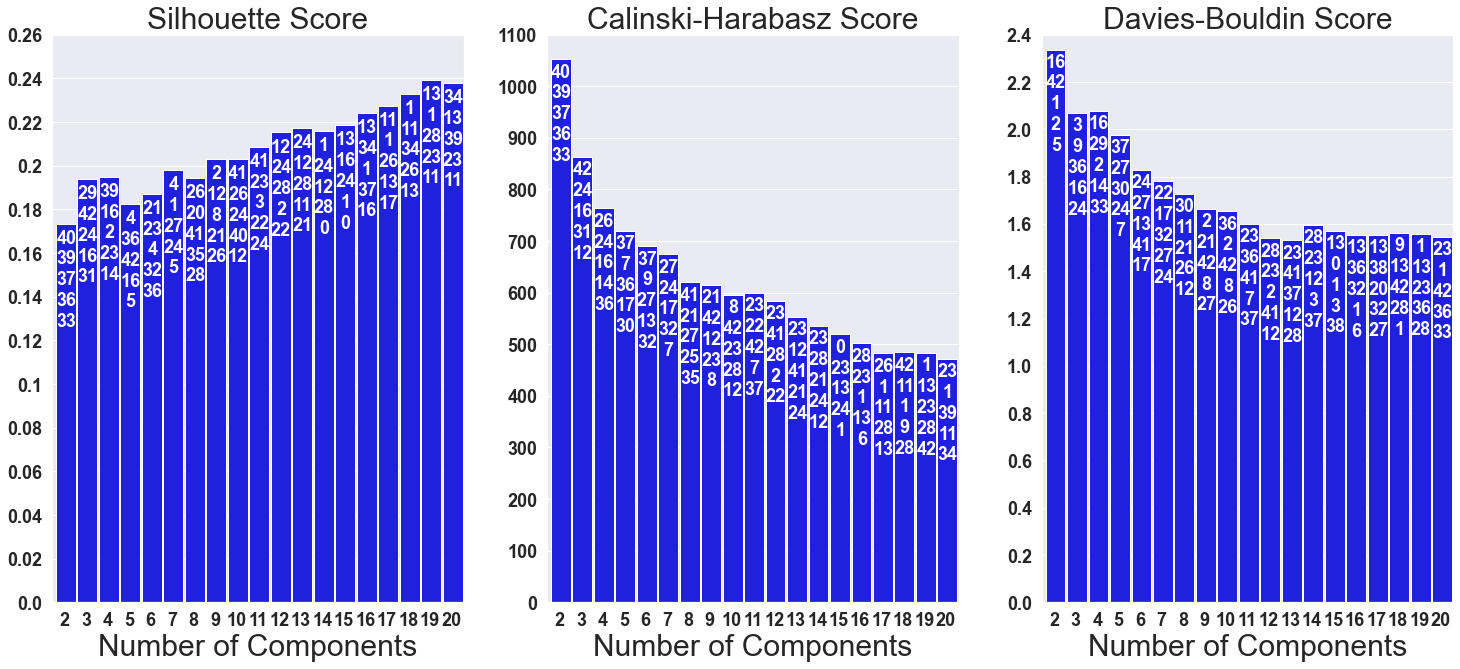

In [37]:
n_clusters = list(range(2,21))
random_state = list(range(0, 43))

sns.set(rc = {'figure.figsize':(21,10)}, style="darkgrid", font_scale=2.5)
plt.subplot(1,3,1)
ax = sns.barplot(x="n", y="scores", data=pd.DataFrame({'n': n_clusters, 'scores': ss_best_scores}), color="blue")
ax.set(title='Silhouette Score', xlabel="Number of Components", ylabel=None, xticks=range(len(ss_best_scores)), yticks=np.arange(0, 0.30, 0.02), ylim=(0,0.26))
ax.set_xticklabels(labels=n_clusters, size=18, weight='bold')
ax.set_yticklabels(labels=np.arange(0, 0.30, 0.02), size=18, weight='bold')
ax.margins(x=.01)
for p, state in zip(ax.patches, ss_best_states):
    ax.annotate("%.0f\n%.0f\n%.0f\n%.0f\n%.0f" % (state[0][1], state[1][1], state[2][1], state[3][1], state[4][1]), (p.get_x() + p.get_width() / 2. + 0.08, p.get_height() - 0.028),
                 ha='center', va='center', fontsize=18, color='white', xytext=(0, 5), fontweight='bold',
                 textcoords='offset points')
    p.set_width(0.925)
plt.subplot(1,3,2)
ax = sns.barplot(x="n", y="scores", data=pd.DataFrame({'n': n_clusters, 'scores': ch_best_scores}), color="blue")
ax.set(title='Calinski-Harabasz Score', xlabel="Number of Components", ylabel=None, xticks=range(len(ch_best_scores)), yticks=np.arange(0, 1200, 100), ylim=(0,1100))
ax.set_xticklabels(labels=n_clusters, size=18, weight='bold')
ax.set_yticklabels(labels=np.arange(0, 1200, 100), size=18, weight='bold')
ax.margins(x=0.01)
for p, state in zip(ax.patches, ch_best_states):
    ax.annotate("%.0f\n%.0f\n%.0f\n%.0f\n%.0f" % (state[0][1], state[1][1], state[2][1], state[3][1], state[4][1]), (p.get_x() + p.get_width() / 2. + 0.08, p.get_height() - 115),
                 ha='center', va='center', fontsize=18,color='white', xytext=(0, 5), fontweight='bold',
                 textcoords='offset points')
    p.set_width(0.925)
plt.subplot(1,3,3)
ax = sns.barplot(x="n", y="scores", data=pd.DataFrame({'n': n_clusters, 'scores': db_best_scores}), color="blue")
ax.set(title='Davies-Bouldin Score', xlabel="Number of Components", ylabel=None, xticks=range(len(db_best_scores)), yticks=np.arange(0, 2.5, 0.2), ylim=(0,2.4))
ax.set_xticklabels(labels=n_clusters, size=18, weight='bold')
ax.set_yticklabels(labels=np.round(np.arange(0, 2.6, 0.2), 1), size=18, weight='bold')
ax.margins(x=0.01)
for p, state in zip(ax.patches, db_best_states):
    ax.annotate("%.0f\n%.0f\n%.0f\n%.0f\n%.0f" % (state[0][1], state[1][1], state[2][1], state[3][1], state[4][1]), (p.get_x() + p.get_width() / 2. + 0.08, p.get_height() - 0.25),
                 ha='center', va='center', fontsize=18, color='white', xytext=(0, 5), fontweight='bold',
                 textcoords='offset points')
    p.set_width(0.925)
plt.tight_layout()
plt.show()

In [38]:
sessions_gmm = sessions.drop(["id"], axis=1)
gmm_model = GaussianMixture(n_components=9, random_state=2)
labels_gmm = gmm_model.fit_predict(sessions_gmm)
sessions_gmm["cluster"] = labels_gmm
print("Silhouette Coefficient: %0.3f" % silhouette_score(sessions_gmm.drop(["cluster"], axis=1), labels_gmm))
print("Calinski Harabasz Coefficient: %0.3f" % calinski_harabasz_score(sessions_gmm.drop(["cluster"], axis=1), labels_gmm))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(sessions_gmm.drop(["cluster"], axis=1), labels_gmm))

Silhouette Coefficient: 0.203
Calinski Harabasz Coefficient: 572.432
Davies Bouldin Coefficient: 1.663


### Finding Local Outliers

In [39]:
sessions_gmm_anomalies = sessions_gmm.copy()
sessions_gmm_anomalies["id"] = sessions["id"]
predictions = gmm_model.predict_proba(sessions_gmm.drop(["cluster"], axis=1))
gmm_thresh = -2 # z-score
sessions_gmm_anomalies["probability"] = [prediction[cluster] for cluster, prediction in zip(sessions_gmm_anomalies['cluster'], predictions) ]
outlier_ids = []
sessions_gmm_anomalies["zscore"] = (sessions_gmm_anomalies["probability"] - np.mean(sessions_gmm_anomalies["probability"])) / np.std(sessions_gmm_anomalies["probability"])
sessions_gmm_anomalies.loc[sessions_gmm_anomalies.zscore <= gmm_thresh, "cluster"] = -1

### Validation Scores after Local Outlier Removal

In [40]:
sessions_gmm_filtered = sessions_gmm_anomalies[sessions_gmm_anomalies["cluster"] != -1].drop(["id", "probability", "zscore"], axis=1)
print("Silhouette Coefficient: %0.3f" % silhouette_score(sessions_gmm_filtered.drop(["cluster"], axis=1), sessions_gmm_filtered['cluster']))
print("Calinski Harabasz Coefficient: %0.3f" % calinski_harabasz_score(sessions_gmm_filtered.drop(["cluster"], axis=1), sessions_gmm_filtered['cluster']))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(sessions_gmm_filtered.drop(["cluster"], axis=1), sessions_gmm_filtered['cluster']))

Silhouette Coefficient: 0.206
Calinski Harabasz Coefficient: 569.690
Davies Bouldin Coefficient: 1.653


### Validation Scores after marking cluster #8 as outlier

In [41]:
sessions_gmm_filtered = sessions_gmm[sessions_gmm["cluster"] != 7]
print("Silhouette Coefficient: %0.3f" % silhouette_score(sessions_gmm_filtered.drop(["cluster"], axis=1), sessions_gmm_filtered['cluster']))
print("Calinski Harabasz Coefficient: %0.3f" % calinski_harabasz_score(sessions_gmm_filtered.drop(["cluster"], axis=1), sessions_gmm_filtered['cluster']))
print("Davies Bouldin Coefficient: %0.3f" % davies_bouldin_score(sessions_gmm_filtered.drop(["cluster"], axis=1), sessions_gmm_filtered['cluster']))

Silhouette Coefficient: 0.208
Calinski Harabasz Coefficient: 651.219
Davies Bouldin Coefficient: 1.671


In [42]:
sessions_gmm.loc[sessions_gmm["cluster"] == 7, "cluster"] = -1
sessions_gmm.loc[sessions_gmm["cluster"] == 8, "cluster"] = 7

# Save Clustered Session per Model

In [45]:
sessions_kmeans_save = sessions.copy()
sessions_kmeans_save["cluster"] = sessions_kmeans_outliers["cluster"]
sessions_kmeans_save.to_csv("sessions_kmeans.csv", sep=';', index=False)

sessions_dbscan_save = sessions.copy()
sessions_dbscan_save["cluster"] = sessions_dbscan["cluster"]
sessions_dbscan_save.to_csv("sessions_dbscan.csv", sep=';', index=False)

sessions_gmm_save = sessions.copy()
sessions_gmm_save["cluster"] = sessions_gmm["cluster"]
sessions_gmm_save.to_csv("sessions_gmm.csv", sep=';', index=False)